In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('2015.csv')

In [3]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
#boslukları _ ile doldurduk.
df.columns=df.columns.str.replace(' ','_')

In [6]:
df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [7]:
#158 satır 12 sütün
df.shape

(158, 12)

In [8]:
# data type düzgün
df.dtypes

Country                           object
Region                            object
Happiness_Rank                     int64
Happiness_Score                  float64
Standard_Error                   float64
Economy_(GDP_per_Capita)         float64
Family                           float64
Health_(Life_Expectancy)         float64
Freedom                          float64
Trust_(Government_Corruption)    float64
Generosity                       float64
Dystopia_Residual                float64
dtype: object

In [9]:
# eksik veri yok
df.isnull().sum()

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                   0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
dtype: int64

In [10]:
df=df.rename(columns={"Economy_(GDP_per_Capita)":"Economy","Health_(Life_Expectancy)":"Life_Expectancy",
                      "Trust_(Government_Corruption)":"Government_Corruption",
                      "Happiness_Rank":"Rank"
                      })

In [11]:
df.columns

Index(['Country', 'Region', 'Rank', 'Happiness_Score', 'Standard_Error',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom',
       'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

## TOP 10 HAPPINES COUNTRY

In [12]:
# 158 ülke var
len(df["Country"].unique())

158

<AxesSubplot:xlabel='Happiness_Score', ylabel='Country'>

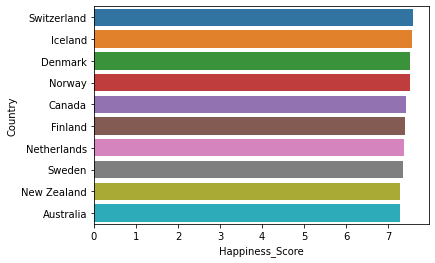

In [13]:
# En mutlu 10 ülke
sns.barplot(y = df["Country"][:10], x = df["Happiness_Score"][:10])

<AxesSubplot:xlabel='Happiness_Score', ylabel='Country'>

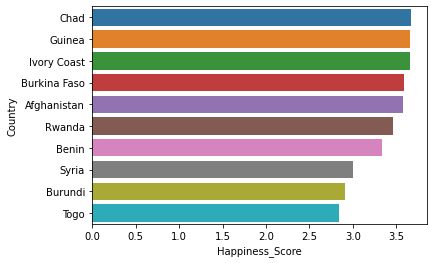

In [14]:
#En mutsuz 10 ülke
sns.barplot(y = df["Country"][-10:], x = df["Happiness_Score"][-10:])

In [15]:
#2015 yılında turkıye 76. sırada
df_turkiye = df[df["Country"]=="Turkey"]

In [16]:
df_turkiye

,Country,Region,Rank,Happiness_Score,Standard_Error,Economy,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


<AxesSubplot:xlabel='Happiness_Score', ylabel='Country'>

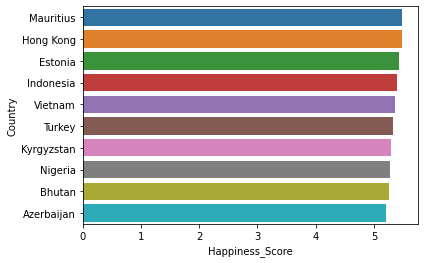

In [17]:
sns.barplot(y = df["Country"][70:80], x = df["Happiness_Score"][70:80])

## DİGER FAKTORLER

In [18]:
df.columns


Index(['Country', 'Region', 'Rank', 'Happiness_Score', 'Standard_Error',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom',
       'Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

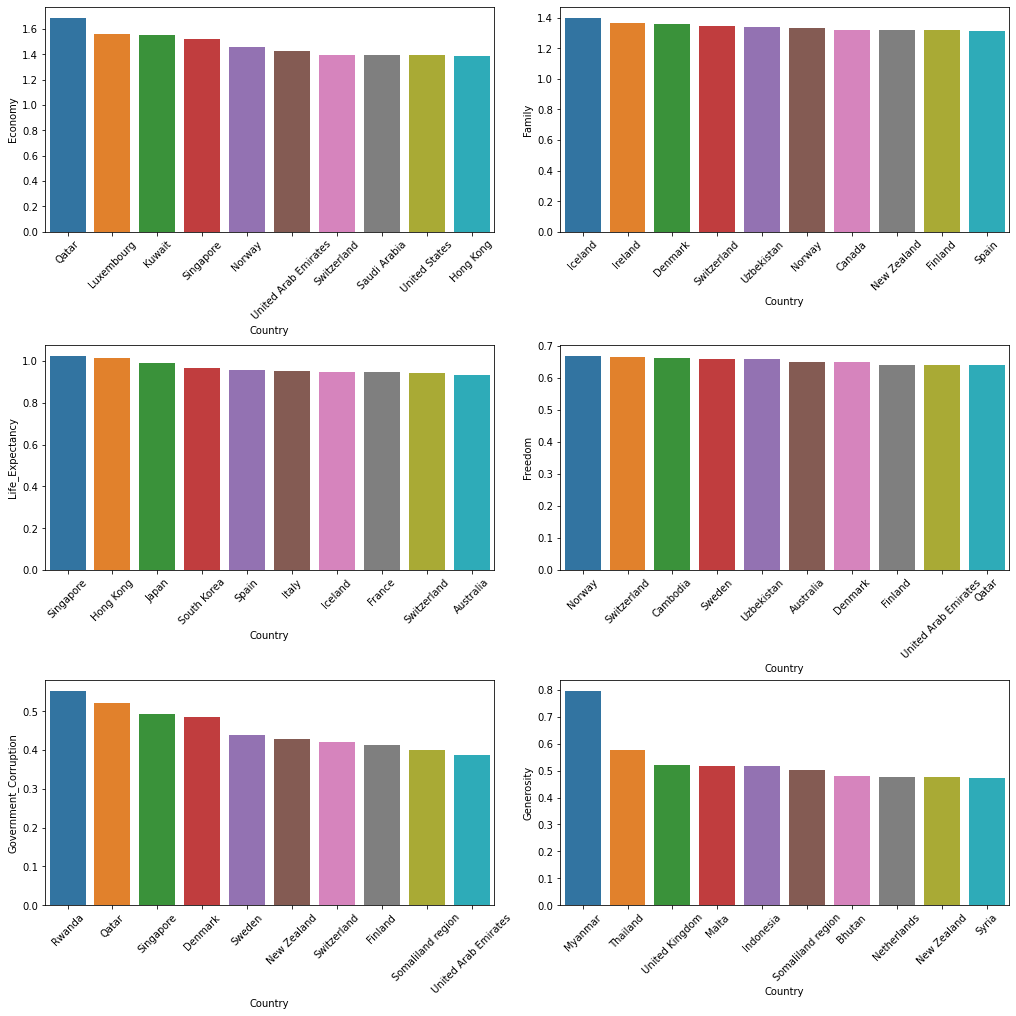

In [19]:
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)

sort_eco = df.sort_values(by = ['Economy'], ascending = False)
sort_eco = sort_eco.head(10)
sort_fa = df.sort_values(by = ['Family'], ascending = False)
sort_fa = sort_fa.head(10)
sort_he = df.sort_values(by = ['Life_Expectancy'], ascending = False)
sort_he = sort_he.head(10)
sort_free = df.sort_values(by = ['Freedom'], ascending = False)
sort_free = sort_free.head(10)
sort_gc = df.sort_values(by = ['Government_Corruption'], ascending = False)
sort_gc = sort_gc.head(10)
sort_genero = df.sort_values(by = ['Generosity'], ascending = False)
sort_genero = sort_genero.head(10)

ax=sns.barplot(x="Country", y="Economy", data=sort_eco, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Family", data=sort_fa, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Life_Expectancy", data=sort_he, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Freedom", data=sort_free, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Government_Corruption", data = sort_gc, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Generosity", data=sort_genero, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)

## Dıger Yıllar

In [44]:
df1=pd.read_csv('2016.csv')
df2=pd.read_csv('2017.csv')
df3=pd.read_csv('2018.csv')
df4=pd.read_csv('2019.csv')

In [45]:
df1.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [46]:
df1.columns=df1.columns.str.replace(' ','_')

In [47]:
df1=df1.rename(columns={"Economy_(GDP_per_Capita)":"Economy","Health_(Life_Expectancy)":"Life_Expectancy",
                      "Trust_(Government_Corruption)":"Government_Corruption","Happiness_Rank":"Rank"
                      })

In [48]:
df1.columns

Index(['Country', 'Region', 'Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval', 'Economy',
       'Family', 'Life_Expectancy', 'Freedom', 'Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [49]:
df2.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [64]:
df2.columns=df2.columns.str.replace('.','_')

In [66]:
df2.columns=df2.columns.str.replace('__','_')

In [67]:
df2.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy_GDP_per_Capita_', 'Family',
       'Health_Life_Expectancy_', 'Freedom', 'Generosity',
       'Trust_Government_Corruption_', 'Dystopia_Residual'],
      dtype='object')

In [68]:
df2=df2.rename(columns={"Economy_GDP_per_Capita_":"Economy","Health_Life_Expectancy_":"Life_Expectancy",
                      "Trust_Government_Corruption_":"Government_Corruption","Happiness_Rank":"Rank"
                      })

In [69]:
df2.columns

Index(['Country', 'Rank', 'Happiness_Score', 'Whisker_high', 'Whisker_low',
       'Economy', 'Family', 'Life_Expectancy', 'Freedom', 'Generosity',
       'Government_Corruption', 'Dystopia_Residual'],
      dtype='object')

In [70]:
df3.columns

Index(['Rank', 'Country', 'Happiness_Score', 'Economy', 'Social_support',
       'Life_Expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [71]:
df3.columns=df3.columns.str.replace(' ','_')

In [72]:
df3.columns

Index(['Rank', 'Country', 'Happiness_Score', 'Economy', 'Social_support',
       'Life_Expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [73]:
df3.head(10)

,Rank,Country,Happiness_Score,Economy,Social_support,Life_Expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


In [74]:
df3=df3.rename(columns={"Country_or_region":"Country","GDP_per_capita":"Economy",
                        "Healthy_life_expectancy":"Life_Expectancy",
                      "Score":"Happiness_Score","Overall_rank":"Rank"
                      })

In [75]:
df3.columns

Index(['Rank', 'Country', 'Happiness_Score', 'Economy', 'Social_support',
       'Life_Expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [76]:
df4.head(10)

,Overall_rank,Country_or_region,Score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [77]:
df4.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [78]:
df4.columns=df4.columns.str.replace(' ','_')

In [79]:
df4.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [80]:
df4=df4.rename(columns={"Country_or_region":"Country","GDP_per_capita":"Economy",
                        "Healthy_life_expectancy":"Life_Expectancy",
                      "Score":"Happiness_Score","Overall_rank":"Rank"
                      })

In [81]:
df4.head(10)

,Rank,Country,Happiness_Score,Economy,Social_support,Life_Expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


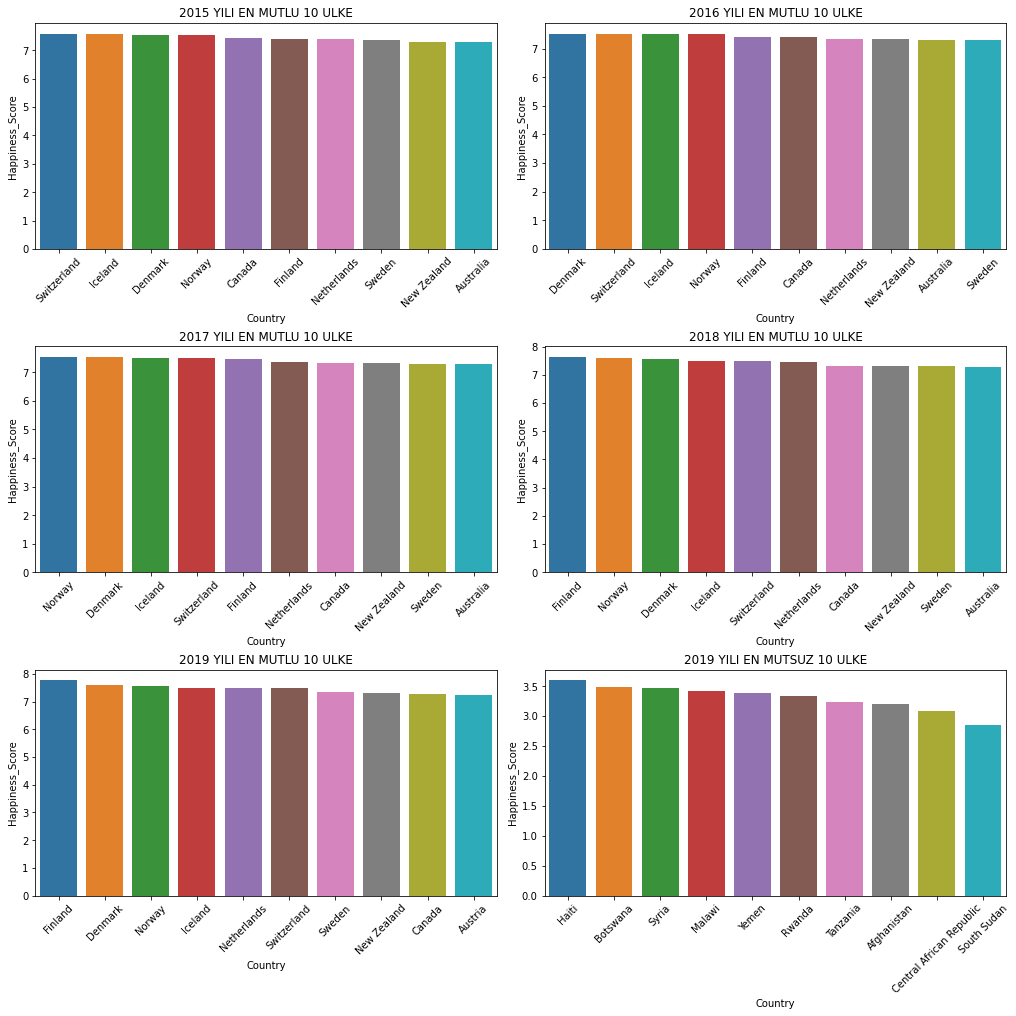

In [82]:
sort_df1 = df1.head(10)
sort_df2 = df2.head(10)
sort_df3 = df3.head(10)
sort_df4 = df4.head(10)
sort_df = df.head(10)
sad_df4 = df4.tail(10)
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)
ax=sns.barplot(x="Country", y="Happiness_Score", data=sort_df , ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_df1, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_df2, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_df3, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sort_df4, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sad_df4, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)
axs[0, 0].title.set_text('2015 YILI EN MUTLU 10 ULKE')
axs[0, 1].title.set_text('2016 YILI EN MUTLU 10 ULKE')
axs[1, 0].title.set_text('2017 YILI EN MUTLU 10 ULKE')
axs[1, 1].title.set_text('2018 YILI EN MUTLU 10 ULKE')
axs[2, 0].title.set_text('2019 YILI EN MUTLU 10 ULKE')
axs[2, 1].title.set_text('2019 YILI EN MUTSUZ 10 ULKE')

## son data SQL ile oluşturuldu

In [83]:
birlesim=pd.read_csv('sondata.csv')

In [84]:
birlesim.head(10)

,country,mutluluk,mutluluk_1,mutluluk_2,mutluluk_3,score
0,Finland,7.406,7.413,7.469,7.632,7.769
1,Denmark,7.527,7.526,7.522,7.555,7.600
2,Norway,7.522,7.498,7.537,7.594,7.554
3,Iceland,7.561,7.501,7.504,7.495,7.494
4,Netherlands,7.378,7.339,7.377,7.441,7.488
5,Switzerland,7.587,7.509,7.494,7.487,7.480
6,Sweden,7.364,7.291,7.284,7.314,7.343
7,New Zealand,7.286,7.334,7.314,7.324,7.307
8,Canada,7.427,7.404,7.316,7.328,7.278
9,Austria,7.200,7.119,7.006,7.139,7.246


In [85]:
birlesim=birlesim.rename(columns={"country":"Country","mutluluk":"2015_yılımutluluk_score",
                                  "mutluluk_1":"2016_yılımutluluk_score",
                                  "mutluluk_2":"2017_yılımutluluk_score",
                                  "mutluluk_3":"2018_yılımutluluk_score",
                                  "score":"2019_yılımutluluk_score"
                        
                      })

In [86]:
birlesim.head(10)

,Country,2015_yılımutluluk_score,2016_yılımutluluk_score,2017_yılımutluluk_score,2018_yılımutluluk_score,2019_yılımutluluk_score
0,Finland,7.406,7.413,7.469,7.632,7.769
1,Denmark,7.527,7.526,7.522,7.555,7.600
2,Norway,7.522,7.498,7.537,7.594,7.554
3,Iceland,7.561,7.501,7.504,7.495,7.494
4,Netherlands,7.378,7.339,7.377,7.441,7.488
5,Switzerland,7.587,7.509,7.494,7.487,7.480
6,Sweden,7.364,7.291,7.284,7.314,7.343
7,New Zealand,7.286,7.334,7.314,7.324,7.307
8,Canada,7.427,7.404,7.316,7.328,7.278
9,Austria,7.200,7.119,7.006,7.139,7.246


## Turkiyenin yıllara gore mutluluk skoru

In [173]:
first_value = list(birlesim[birlesim.Country=='Turkey'].values[0][1:6])
yıllar=list(birlesim.columns[1:6])

Text(0.5, 1.0, "Türkiye'nin yıllara göre mutluluk skoru")

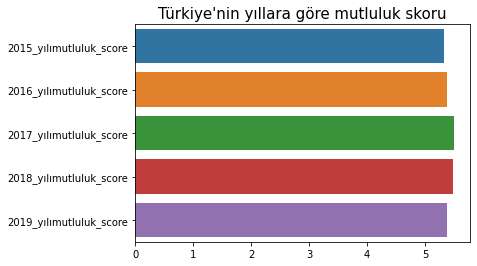

In [174]:
sns.barplot( y=yıllar,x =first_value)
plt.title("Türkiye'nin yıllara göre mutluluk skoru", size=15)

## Herhangi bir ulkenin yıllara gore mutluluk skoru

ulke ismini girgermany


Text(0.5, 1.0, "Germany'nin yıllara göre mutluluk skoru")

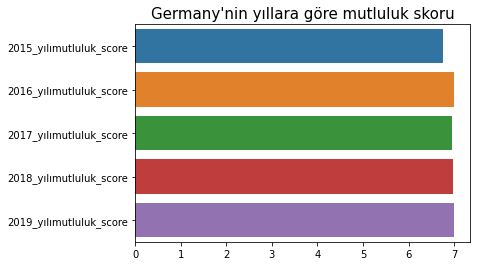

In [182]:
a=input('ulke ismini gir')
a=a.capitalize()
first_value = list(birlesim[birlesim.Country==a].values[0][1:6])
yıllar=list(birlesim.columns[1:6])
sns.barplot( y=yıllar,x =first_value)
plt.title("{}'nin yıllara göre mutluluk skoru".format(a), size=15)

In [183]:
birlesim.head(10)

,Country,2015_yılımutluluk_score,2016_yılımutluluk_score,2017_yılımutluluk_score,2018_yılımutluluk_score,2019_yılımutluluk_score
0,Finland,7.406,7.413,7.469,7.632,7.769
1,Denmark,7.527,7.526,7.522,7.555,7.600
2,Norway,7.522,7.498,7.537,7.594,7.554
3,Iceland,7.561,7.501,7.504,7.495,7.494
4,Netherlands,7.378,7.339,7.377,7.441,7.488
5,Switzerland,7.587,7.509,7.494,7.487,7.480
6,Sweden,7.364,7.291,7.284,7.314,7.343
7,New Zealand,7.286,7.334,7.314,7.324,7.307
8,Canada,7.427,7.404,7.316,7.328,7.278
9,Austria,7.200,7.119,7.006,7.139,7.246


## Diger bilgiler

In [269]:
a=birlesim['2015_yılımutluluk_score']-birlesim['2019_yılımutluluk_score'].round(3)


In [270]:
#2015 yılından 2019 yılını  cıkartıp verisetine ekledım.
birlesim['Fark']=a

In [271]:
birlesim.head(10)

,Country,2015_yılımutluluk_score,2016_yılımutluluk_score,2017_yılımutluluk_score,2018_yılımutluluk_score,2019_yılımutluluk_score,Fark,Mutlak
101,Venezuela,6.810,6.084,5.250,4.806,4.707,2.103,0.003
126,Zambia,5.129,4.795,4.514,4.377,4.107,1.022,0.004
132,Zimbabwe,4.610,4.193,3.875,3.692,3.663,0.947,0.014
133,Haiti,4.518,4.028,3.603,3.582,3.597,0.921,0.017
136,Malawi,4.292,4.156,3.970,3.587,3.410,0.882,0.019
134,Botswana,4.332,3.974,3.766,3.590,3.488,0.844,0.021
137,Yemen,4.077,3.724,3.593,3.355,3.380,0.697,0.021
30,Brazil,6.983,6.952,6.635,6.419,6.300,0.683,0.025
129,Liberia,4.571,3.622,3.533,3.495,3.975,0.596,0.025
22,Mexico,7.187,6.778,6.578,6.488,6.595,0.592,0.028


In [272]:
# Farkı buyukten kucugue dogru sıraladım
birlesim = birlesim.sort_values(by = ['Fark'], ascending = [False])

In [273]:
#2015 ve 2019 yılı baz alınarak mutluluk skoru en cok azaln 10 ulke fark pozitif oldugu için mutluluk skoru en
#cok azalan ulkelerdir.
birlesim.head(10)

,Country,2015_yılımutluluk_score,2016_yılımutluluk_score,2017_yılımutluluk_score,2018_yılımutluluk_score,2019_yılımutluluk_score,Fark,Mutlak
101,Venezuela,6.810,6.084,5.250,4.806,4.707,2.103,0.003
126,Zambia,5.129,4.795,4.514,4.377,4.107,1.022,0.004
132,Zimbabwe,4.610,4.193,3.875,3.692,3.663,0.947,0.014
133,Haiti,4.518,4.028,3.603,3.582,3.597,0.921,0.017
136,Malawi,4.292,4.156,3.970,3.587,3.410,0.882,0.019
134,Botswana,4.332,3.974,3.766,3.590,3.488,0.844,0.021
137,Yemen,4.077,3.724,3.593,3.355,3.380,0.697,0.021
30,Brazil,6.983,6.952,6.635,6.419,6.300,0.683,0.025
129,Liberia,4.571,3.622,3.533,3.495,3.975,0.596,0.025
22,Mexico,7.187,6.778,6.578,6.488,6.595,0.592,0.028


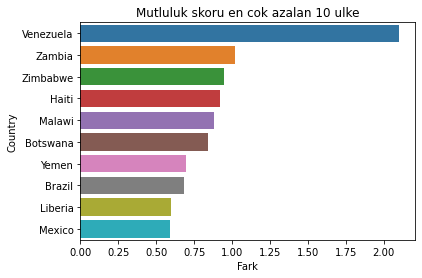

In [274]:
sns.barplot(y = birlesim["Country"][:10], x = birlesim["Fark"][:10])
plt.title('Mutluluk skoru en cok azalan 10 ulke')
plt.show()

In [275]:
#2015 ve 2019 yılı baz alınarak mutluluk skoru en cok artan 10 ulke fark negatif oldugu için mutluluk skoru artmıs oluyor
birlesim.tail(10)

,Country,2015_yılımutluluk_score,2016_yılımutluluk_score,2017_yılımutluluk_score,2018_yılımutluluk_score,2019_yılımutluluk_score,Fark,Mutlak
109,Guinea,3.656,3.607,3.507,3.964,4.534,-0.878,0.946
102,Cambodia,3.819,3.907,4.168,4.433,4.700,-0.881,0.947
98,Gabon,3.896,4.121,4.465,4.758,4.799,-0.903,0.958
45,Romania,5.124,5.528,5.825,5.945,6.070,-0.946,1.000
59,Hungary,4.800,5.145,5.324,5.620,5.758,-0.958,1.022
106,Burkina Faso,3.587,3.739,4.032,4.424,4.587,-1.000,1.072
56,Honduras,4.788,4.871,5.181,5.504,5.860,-1.072,1.246
127,Togo,2.839,3.303,3.495,3.999,4.085,-1.246,1.289
93,Ivory Coast,3.655,3.916,4.180,4.671,4.944,-1.289,1.543
96,Benin,3.340,3.484,3.657,4.141,4.883,-1.543,2.103


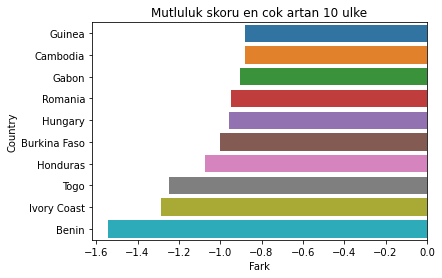

In [276]:
sns.barplot(y = birlesim["Country"][-10:], x = birlesim["Fark"][-10:])
plt.title('Mutluluk skoru en cok artan 10 ulke')
plt.show()

In [283]:
import numpy as np
mutlak_deger=list(map(abs, birlesim['Fark']))
mutlak_deger = np.array(mutlak_deger, dtype=np.float32).round(3)

In [278]:
mutlak_deger

array([2.103, 1.022, 0.947, 0.921, 0.882, 0.844, 0.697, 0.683, 0.596,
       0.592, 0.55 , 0.55 , 0.536, 0.49 , 0.488, 0.465, 0.447, 0.431,
       0.394, 0.372, 0.36 , 0.352, 0.349, 0.327, 0.301, 0.286, 0.278,
       0.274, 0.24 , 0.24 , 0.238, 0.237, 0.229, 0.227, 0.226, 0.226,
       0.207, 0.192, 0.185, 0.171, 0.149, 0.139, 0.138, 0.135, 0.133,
       0.131, 0.127, 0.111, 0.107, 0.101, 0.099, 0.089, 0.076, 0.068,
       0.067, 0.059, 0.056, 0.046, 0.036, 0.028, 0.025, 0.021, 0.019,
       0.014, 0.004, 0.003, 0.017, 0.021, 0.025, 0.032, 0.041, 0.046,
       0.051, 0.053, 0.053, 0.054, 0.073, 0.08 , 0.081, 0.09 , 0.095,
       0.11 , 0.123, 0.144, 0.171, 0.181, 0.187, 0.195, 0.203, 0.209,
       0.222, 0.235, 0.239, 0.252, 0.258, 0.27 , 0.275, 0.277, 0.313,
       0.316, 0.331, 0.347, 0.357, 0.358, 0.363, 0.363, 0.391, 0.395,
       0.399, 0.411, 0.411, 0.424, 0.43 , 0.437, 0.456, 0.459, 0.464,
       0.48 , 0.511, 0.54 , 0.558, 0.591, 0.681, 0.683, 0.777, 0.783,
       0.792, 0.793,

In [285]:
birlesim['Mutlak']=mutlak_deger

In [292]:
birlesim=birlesim.sort_values('Mutlak')

In [293]:
birlesim.tail(10)

,Country,2015_yılımutluluk_score,2016_yılımutluluk_score,2017_yılımutluluk_score,2018_yılımutluluk_score,2019_yılımutluluk_score,Fark,Mutlak
45,Romania,5.124,5.528,5.825,5.945,6.070,-0.946,0.946
132,Zimbabwe,4.610,4.193,3.875,3.692,3.663,0.947,0.947
59,Hungary,4.800,5.145,5.324,5.620,5.758,-0.958,0.958
106,Burkina Faso,3.587,3.739,4.032,4.424,4.587,-1.000,1.000
126,Zambia,5.129,4.795,4.514,4.377,4.107,1.022,1.022
56,Honduras,4.788,4.871,5.181,5.504,5.860,-1.072,1.072
127,Togo,2.839,3.303,3.495,3.999,4.085,-1.246,1.246
93,Ivory Coast,3.655,3.916,4.180,4.671,4.944,-1.289,1.289
96,Benin,3.340,3.484,3.657,4.141,4.883,-1.543,1.543
101,Venezuela,6.810,6.084,5.250,4.806,4.707,2.103,2.103


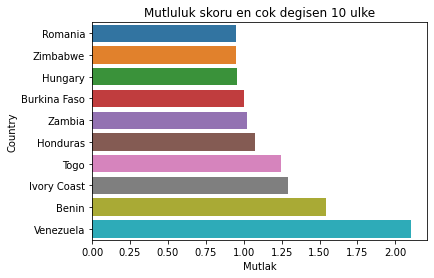

In [294]:
sns.barplot(y = birlesim["Country"][-10:], x = birlesim["Mutlak"][-10:])
plt.title('Mutluluk skoru en cok degisen 10 ulke')
plt.show()

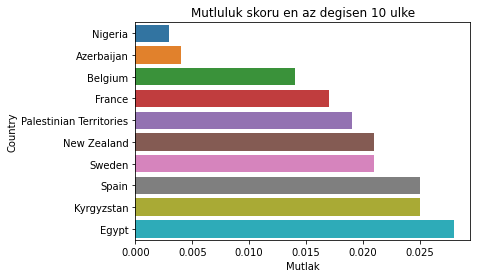

In [295]:
sns.barplot(y = birlesim["Country"][:10], x = birlesim["Mutlak"][:10])
plt.title('Mutluluk skoru en az degisen 10 ulke')
plt.show()